### Data downloading

Follow the [instructions in README.md](https://github.com/allenai/spoc-robot-training?tab=readme-ov-file#-downloading-assets-annotations-and-houses-) to get all data downloaded (annotations, assets, and houses).

In [1]:
OBJAVERSE_DATA_DIR = "/home/andreina/Documents/Programs/Dataset/objaverse_assets"  # use here the path where assets and annotations were downloaded to
OBJAVERSE_HOUSES_DIR = "/home/andreina/Documents/Programs/Dataset/objaverse_assets/objaverse_houses/houses_2023_07_28"  # use here the path where houses were downloaded to

%set_env OBJAVERSE_DATA_DIR=$OBJAVERSE_DATA_DIR
%set_env OBJAVERSE_HOUSES_DIR=$OBJAVERSE_HOUSES_DIR

env: OBJAVERSE_DATA_DIR=/home/andreina/Documents/Programs/Dataset/objaverse_assets
env: OBJAVERSE_HOUSES_DIR=/home/andreina/Documents/Programs/Dataset/objaverse_assets/objaverse_houses/houses_2023_07_28


### Using annotations

This example shows how to load annotations and lists the contents for a random asset UID.

In [2]:
from utils.objaverse_annotation import get_objaverse_annotations
import random
import json

# Gets the annotation dict
annotation = get_objaverse_annotations()

print(f"{len(annotation)} entries")
print(f"Sample:\n{json.dumps(annotation[random.choice(list(annotation.keys()))], indent=2)}")

39664 entries
Sample:
{
  "uid": "0d8a146ff3604690ad3911e4e9f9669b",
  "description_auto": null,
  "pose_z_rot_angle": 6.28,
  "size": [
    60,
    3,
    80
  ],
  "size_annotated_by": "gpt-4",
  "is_objaverse_plus": true,
  "split": "train",
  "category": "painting",
  "synset": "painting.n.01",
  "synset_labeled_by": "gpt-3.5",
  "most_specific_lemma": "painting",
  "description": "A painting of a black haired girl with a dour expression near some green lockers.",
  "scale": 0.8,
  "scale_annotated_by": "gpt-4",
  "z_axis_scale": false,
  "wn_version": "oewn:2022",
  "license_info": {
    "license": "by",
    "uri": "https://api.sketchfab.com/v3/models/0d8a146ff3604690ad3911e4e9f9669b",
    "creator_username": "igor.rizaev00",
    "creator_display_name": "\ud83c\udf15\ud83e\udd89sleepy owl\ud83e\udd89\ud83c\udf15",
    "creator_profile_url": "https://sketchfab.com/igor.rizaev00"
  },
  "ref_category": "Painting",
  "receptacle": false,
  "thor_metadata": {
    "assetMetadata": {
  

Let's find the frequency of (available) GPT-generated descriptions and list the most commonly appearing ones.

In [3]:
from collections import Counter
counts = Counter()
for entry in annotation.values():
    counts[entry["description_auto"]] += 1
print(f"Most common: {counts.most_common(5)}")

Most common: [(None, 6103), ('a wooden barrel.', 173), ('a wooden barrel', 68), ('a wooden chair.', 48), ('a wooden chair', 39)]


### Loading houses and required assets

First, let's see how to load house data. For example, load the first house from the `val` partition.

In [4]:
import os

import prior

from utils.constants.objaverse_data_dirs import OBJAVERSE_HOUSES_DIR

houses = prior.load_dataset(
    dataset="spoc-data",
    entity="spoc-robot",
    revision="local-objaverse-procthor-houses",
    path_to_splits=None,
    split_to_path={
        k: os.path.join(OBJAVERSE_HOUSES_DIR, f"{k}.jsonl.gz")
        for k in ["val"]
    },
    max_houses_per_split=2,
)['val']

print(f"{len(houses)} loaded val houses")
print(f"Sample room description:\n{json.dumps(houses[0]['rooms'][0], indent=2)}")

Loading /home/andreina/Documents/Programs/Dataset/objaverse_assets/objaverse_houses/houses_2023_07_28/val.jsonl.gz: 1it [00:00, 1452.32it/s]

2 loaded val houses
Sample room description:
{
  "id": "room|4",
  "roomType": "Bedroom",
  "children": [],
  "ceilings": [],
  "floorPolygon": [
    {
      "x": 0.0,
      "y": 0,
      "z": 8.427
    },
    {
      "x": 6.32,
      "y": 0,
      "z": 8.427
    },
    {
      "x": 6.32,
      "y": 0,
      "z": 4.213
    },
    {
      "x": 0.0,
      "y": 0,
      "z": 4.213
    }
  ],
  "floorMaterial": {
    "name": "WhiteWood"
  },
  "layer": "Procedural2"
}


Now, let's load the house (and all required assets) as a THOR scene. The agent is the Stretch Robot with two RGB cameras (navigation and manipulation) used in our paper.

In [5]:
print(houses)

Dataset(
    dataset=procthor-100k,
    size=2,
    split=val
)



nav


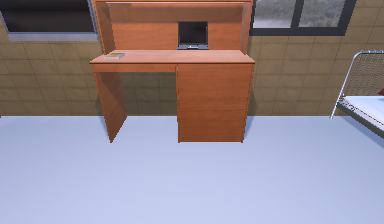

In [7]:
from PIL import Image

from environment.stretch_controller import StretchController
from utils.constants.stretch_initialization_utils import STRETCH_ENV_ARGS

c = StretchController(**STRETCH_ENV_ARGS)
event = c.reset(houses[0])
# print(houses[0])

# print(event)
print("\nnav")
display(Image.fromarray(c.navigation_camera))
# print("\nmanip")
# display(Image.fromarray(c.manipulation_camera))

We can also easily extract available descriptions for objects in the environment. In this example, let's consider all objects visible in each camera up to a maximum distance of 5 meters:

In [8]:
print("Navigation camera:")
for it, obj in enumerate(c.get_visible_objects("nav", maximum_distance=5)):
    print(it, c.get_object(obj)["description"])

# print("\nManipulation camera:")
# for it, obj in enumerate(c.get_visible_objects("manip", maximum_distance=5)):
#     print(it, c.get_object(obj)["description"])

c.stop()

Navigation camera:
0 undescribed THOR item, type Drawer
1 undescribed THOR item, type Drawer
2 undescribed THOR item, type Floor
3 undescribed THOR item, type Desk
4 undescribed THOR item, type Laptop
5 undescribed THOR item, type Television
6 A red container with vents on the top.
7 undescribed THOR item, type Wall
8 undescribed THOR item, type Window
9 undescribed THOR item, type Book
10 undescribed THOR item, type Wall
11 undescribed THOR item, type Bed
12 undescribed THOR item, type Drawer
13 undescribed THOR item, type Dresser
14 undescribed THOR item, type Drawer
